In [0]:
!pip install tensorflow==2.0.0-alpha0

     |████████████████████████████████| 79.9MB 81kB/s 
     |████████████████████████████████| 419kB 47.5MB/s 
     |████████████████████████████████| 3.0MB 31.2MB/s 
  Found existing installation: tensorflow 2.2.0rc3
    Uninstalling tensorflow-2.2.0rc3:
      Successfully uninstalled tensorflow-2.2.0rc3


In [0]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train_file = "/content/drive/My Drive/Colab Notebooks/trainig.zip"

In [0]:
import zipfile

with zipfile.ZipFile(train_file, 'r') as z:
    z.extractall("/rain")

In [0]:
import os
import cv2

def load_image(file_path):
    return cv2.imread(file_path)

def extract_label(file_name):
     if "jacket" in file_name :
       return 1
     elif  'kurti'in file_name :
       return 2
     elif  'long'in file_name :
       return 3
     elif 'one' in file_name :
       return 4
     elif 'pant' in file_name :
       return 5
     elif  'sari' in file_name :
       return 6
     elif  'tshirt' in file_name :
       return 7
     elif  'short' in file_name :
       return 8
     elif  'skirt' in file_name :
       return 9
     elif  'shirt' in file_name :
       return 10

     else:
       return 11
    
       
     
train_path = "/rain/"
image_files = os.listdir(train_path)
train_images = [load_image(train_path + file) for file in image_files]
train_labels = [extract_label(file) for file in image_files]

In [0]:
import numpy as np

In [0]:
def preprocess_image(img, side=96):
    min_side = min(img.shape[0], img.shape[1])
    img = img[:min_side, :min_side]
    img = cv2.resize(img, (side,side))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img / 255.0

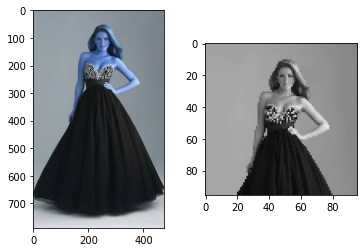

In [0]:

import matplotlib.pyplot as plt
%matplotlib inline

preview_index = 10
plt.subplot(1,2,1)
plt.imshow(train_images[preview_index])
plt.subplot(1,2,2)
plt.imshow(preprocess_image(train_images[preview_index]), cmap="gray")

In [0]:
for i in range(len(train_images)):
    train_images[i] = preprocess_image(train_images[i])

In [0]:
import numpy as np

train_images = np.expand_dims(train_images, axis=-1)
train_labels = np.array(train_labels)
print(train_images.shape, train_labels.shape)

(1508, 96, 96, 1) (1508,)


In [0]:
import tensorflow as tf
print("Tensorflow:", tf.__version__)

layers = [
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding="same", activation=tf.nn.relu, input_shape=train_images.shape[1:]),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=256, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=12, activation=tf.nn.softmax)
]

model = tf.keras.Sequential(layers)
model.compile(optimizer=tf.optimizers.Adam(),
              loss=tf.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.metrics.SparseCategoricalAccuracy()])
history=model.fit(train_images, train_labels, epochs=30, batch_size=50)
model.save_weights("model.tf")

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

Tensorflow: 2.0.0-alpha0
Epoch 1/30
1508/1508 [==============================] - 17s 11ms/sample - loss: 2.3458 - sparse_categorical_accuracy: 0.1008
Epoch 2/30
1508/1508 [==============================] - 17s 11ms/sample - loss: 2.1433 - sparse_categorical_accuracy: 0.2195
Epoch 3/30
1508/1508 [==============================] - 17s 11ms/sample - loss: 1.8186 - sparse_categorical_accuracy: 0.3554
Epoch 4/30
1508/1508 [==============================] - 17s 11ms/sample - loss: 1.5445 - sparse_categorical_accuracy: 0.4523
Epoch 5/30
1508/1508 [==============================] - 17s 11ms/sample - loss: 1.3179 - sparse_categorical_accuracy: 0.5312
Epoch 6/30
1508/1508 [==============================] - 17s 11ms/sample - loss: 1.1821 - sparse_categorical_accuracy: 0.5796
Epoch 7/30
1508/1508 [==============================] - 17s 11ms/sample - loss: 1.0299 - sparse_categorical_accuracy: 0.6253
Epoch 8/30
1508/1508 [==============================] - 17s 11ms/sample - loss: 0.8942 - sparse_cate

In [0]:
from google.colab import files
uploads = files.upload()

Saving short1.jpg to short1.jpg
Saving short2.jpg to short2.jpg
Saving short3.jpg to short3.jpg
Saving short4.jpg to short4.jpg
Saving skirt2.jpg to skirt2.jpg
Saving skirt3.jpg to skirt3.jpg
Saving skirt4.jpg to skirt4.jpg
Saving skirts1.jpg to skirts1.jpg
Saving t-shirt1.jpg to t-shirt1.jpg
Saving t-shirt2.jpg to t-shirt2.jpg
Saving t-shirt3.jpg to t-shirt3.jpg


In [0]:
def func(n):
  if n==1:
    return "jacket"
  elif n==2:
    return "kurti"
  elif n==3:
    return "long"
  elif n==4:
    return "one"
  elif n==5:
    return "pant"
  elif n==6:
    return "saree"
  elif n==7:
    return "t-shirt"
  elif n==8:
    return "short"
  elif n==9:
    return "skirt"
  elif n==10:
    return "shirt"
  else:
    return " not detected "

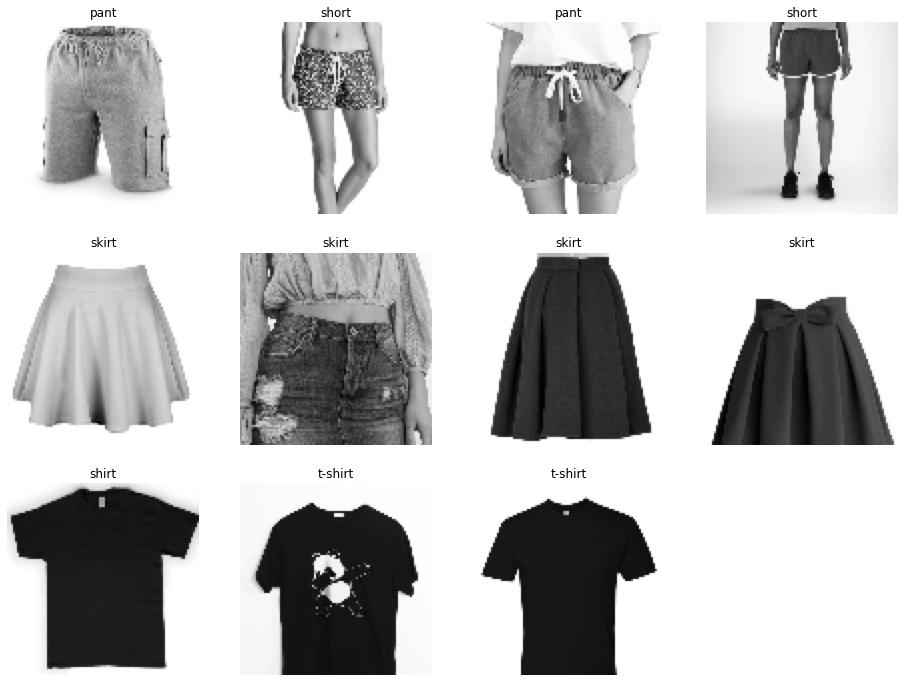

In [0]:
eval_images = [preprocess_image(load_image(file)) for file in uploads.keys()]
eval_model = tf.keras.Sequential(layers)
eval_model.load_weights("model.tf")
eval_predictions = eval_model.predict(np.expand_dims(eval_images, axis=-1))

cols = 4
rows = np.ceil(len(eval_images)/cols)
fig = plt.gcf()
fig.set_size_inches(cols * 4, rows * 4)
for i in range(len(eval_images)):
    plt.subplot(rows, cols, i+1)
    plt.imshow(eval_images[i], cmap="gray")
    plt.title( func(np.argmax(eval_predictions[i])) 
    )

              
    plt.axis('off')

In [0]:
if os.path.isfile("/content/temp/photo.jpg"):
    os.remove("/content/temp/photo.jpg")


In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


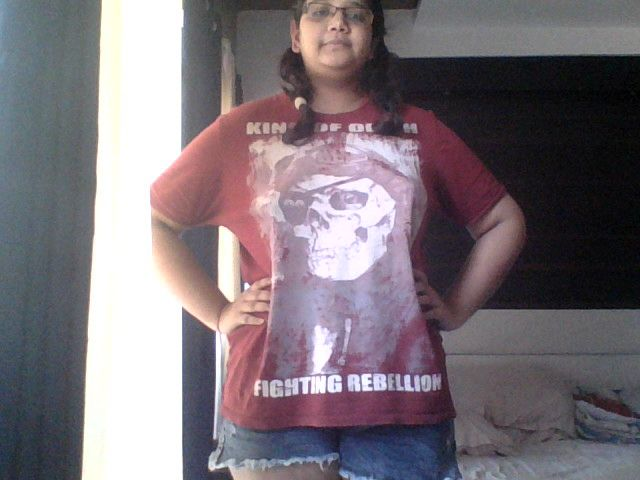

In [0]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [0]:
import os
import shutil
if os.path.isfile("/tmp/photo.jpg"):
    os.remove("/tmp/photo.jpg")

shutil.move("/content/photo.jpg", "/tmp")

'/tmp/photo.jpg'

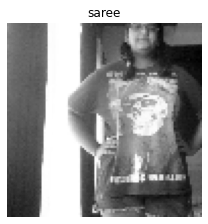

In [0]:
eval_images = [preprocess_image(load_image("/tmp/photo.jpg")) ]
eval_model = tf.keras.Sequential(layers)
eval_model.load_weights("model.tf")
eval_predictions = eval_model.predict(np.expand_dims(eval_images, axis=-1))

cols = 4
rows = np.ceil(len(eval_images)/cols)
fig = plt.gcf()
fig.set_size_inches(cols * 4, rows * 4)
for i in range(len(eval_images)):
    plt.subplot(rows, cols, i+1)
    plt.imshow(eval_images[i], cmap="gray")
    plt.title( func(np.argmax(eval_predictions[i])) 
    )

              
    plt.axis('off')